In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle

# libreria normalización y estandarización
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


import statsmodels.formula.api as smf

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree


from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# soporte para limpieza
import sys
sys.path.append("../")

import src.soporte as sp

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,10)

In [2]:
df_train = pd.read_csv("../data/train.csv")

In [3]:
df_train.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983


In [4]:
df_train_  = df_train.copy()
df_train_ = df_train_[['id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price']]

In [5]:
df_elim = df_train_[(df_train_["z"] == 0) | (df_train_["x"] == 0) | (df_train_["y"] == 0)]
df_elim.shape

(17, 10)

In [6]:
df_train2 = df_train_.copy()

In [7]:
df_train2.drop(df_elim.index, axis = 0, inplace = True)

In [8]:
lista_columnas = df_train2.select_dtypes(include = np.number).columns
lista_columnas

Index(['id', 'carat', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [9]:
# aplicamos la función y sacamos los índices de los outliers.

indice = sp.detectar_outliers(lista_columnas, df_train2)

In [10]:
for k, v in indice.items():
    mediana = df_train2[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df_train2.loc[i,k] = mediana 

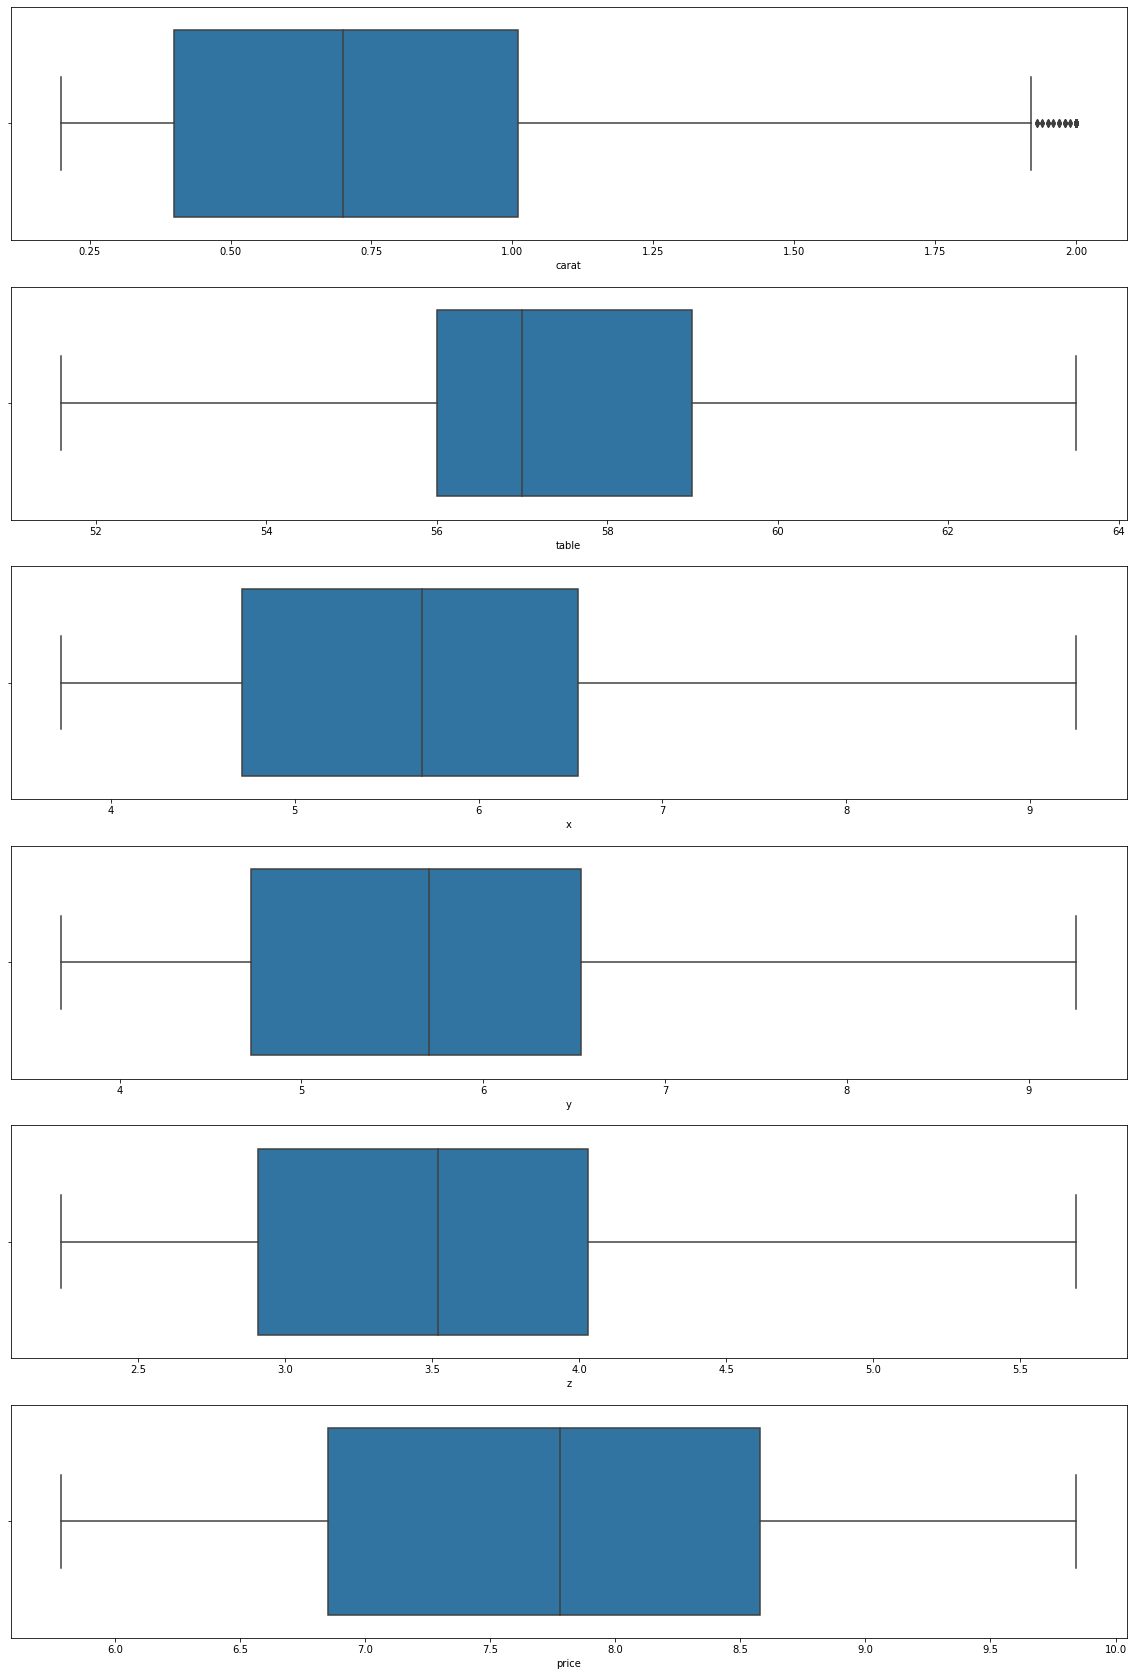

In [11]:
fig, ax = plt.subplots(6, 1, figsize=(20,30))

df_number = df_train2[['carat', 'table', 'x', 'y', 'z', 'price']]
for i in range(len(df_number.columns)):
    sns.boxplot(x = df_number.columns[i], data = df_number, ax = ax[i])
plt.show();

<h2>Estandarización</h2>

In [12]:
robust = RobustScaler()

In [13]:
robust.fit(df_train2[['carat', 'table', 'x', 'y', 'z']])

RobustScaler()

In [14]:
X_robust = robust.transform(df_train2[['carat', 'table', 'x', 'y', 'z']])

In [15]:
df_train3 = df_train2.copy()

In [16]:
df_train3[['carat', 'table', 'x', 'y', 'z']] = X_robust
df_train3.head()

,id,carat,cut,color,clarity,table,x,y,z,price
0,0,-0.655738,Premium,D,SI2,0.333333,-0.754098,-0.781293,-0.750000,6.353
1,1,0.508197,Ideal,E,VVS2,-0.333333,0.398907,0.418157,0.464286,9.183
2,2,0.032787,Ideal,F,VS2,0.666667,0.010929,0.022008,0.017857,7.983
3,3,0.622951,Very Good,G,SI2,0.000000,0.464481,0.440165,0.535714,8.371
4,4,-0.557377,Premium,G,VS1,0.666667,-0.650273,-0.632737,-0.625000,6.588


In [17]:
with open('../data/modelo_2/estandarizacion.pkl', 'wb') as s:
    pickle.dump(robust, s)

<h2>Encoding</h2>

In [18]:
df_train4 = df_train3.copy()

In [19]:
df_train4 = sp.ordinal_encoder(df_train4, "cut", ["Ideal", "Very Good", "Good", "Premium", "Fair"], 2)


# with open(f'../data/modelo_2/encoding_cut.pkl', 'wb') as s:
#         pickle.dump(ordinal, s)

In [20]:
df_train4 = sp.ordinal_encoder(df_train4, "color", ["E", "D", "F", "G", "H", "I", "J"], 2)

# with open(f'../data/modelo_2/encoding_color.pkl', 'wb') as s:
#         pickle.dump(ordinal, s)

In [21]:
df_train4 = sp.ordinal_encoder(df_train4, "clarity", ["VVS1", "IF", "VVS2", "VS1", "VS2", "SI1", "I1", "SI2"], 2)

# with open(f'../data/modelo_2/encoding_clarity.pkl', 'wb') as s:
#         pickle.dump(ordinal, s)

In [22]:
df_train4.head()

,id,carat,cut,color,clarity,table,x,y,z,price,cut_mapeada,color_mapeada,clarity_mapeada
0,0,-0.655738,Premium,D,SI2,0.333333,-0.754098,-0.781293,-0.750000,6.353,3,1,7
1,1,0.508197,Ideal,E,VVS2,-0.333333,0.398907,0.418157,0.464286,9.183,0,0,2
2,2,0.032787,Ideal,F,VS2,0.666667,0.010929,0.022008,0.017857,7.983,0,2,4
3,3,0.622951,Very Good,G,SI2,0.000000,0.464481,0.440165,0.535714,8.371,1,3,7
4,4,-0.557377,Premium,G,VS1,0.666667,-0.650273,-0.632737,-0.625000,6.588,3,3,3


In [23]:
df = df_train4.copy()
df = df_train4[['carat', 'table', 'x', 'y', 'z', 'cut_mapeada', 'color_mapeada', 'clarity_mapeada', 'price']]
df.head(5)

,carat,table,x,y,z,cut_mapeada,color_mapeada,clarity_mapeada,price
0,-0.655738,0.333333,-0.754098,-0.781293,-0.750000,3,1,7,6.353
1,0.508197,-0.333333,0.398907,0.418157,0.464286,0,0,2,9.183
2,0.032787,0.666667,0.010929,0.022008,0.017857,0,2,4,7.983
3,0.622951,0.000000,0.464481,0.440165,0.535714,1,3,7,8.371
4,-0.557377,0.666667,-0.650273,-0.632737,-0.625000,3,3,3,6.588


<h2>Decision Tree</h2>

In [24]:
X = df.drop("price", axis = 1)
y = df["price"] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [25]:
y_train.describe()

count    36394.000000
mean         7.785014
std          1.015915
min          5.787000
25%          6.851000
50%          7.782000
75%          8.579000
max          9.842000
Name: price, dtype: float64

In [26]:
y_test.describe()

count    4044.000000
mean        7.768586
std         1.023411
min         5.823000
25%         6.848000
50%         7.739000
75%         8.586000
max         9.839000
Name: price, dtype: float64

In [27]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
max_features = np.sqrt(len(X_train.columns))
max_features

2.8284271247461903

In [29]:
print(regressor.tree_.max_depth)

33


In [30]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [31]:
dt_results1 = sp.metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.085911,0.015578,0.124811,0.985123,test,Decission Tree I
1,0.000195,0.000015,0.003908,0.999985,train,Decission Tree I


In [32]:
df_all = dt_results1.copy()

In [33]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 8, 9, 10],
        "min_samples_split": [10, 20, 30, 40, 50, 100, 150],
        "max_features": [3, 4, 5, 6, 7]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [34]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 5.44 s
Wall time: 24.3 s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 8, 9, 10],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [10, 20, 30, 40, 50, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=10, max_features=7, min_samples_split=30)

In [36]:
y_pred_test_dt = gs.predict(X_test)
y_pred_train_dt = gs.predict(X_train)

In [37]:
dt_results2 = sp.metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.090322,0.014170,0.119039,0.986467,test,Decission Tree II
1,0.084314,0.012656,0.112497,0.987737,train,Decission Tree II


In [38]:
df_all = pd.concat([df_all, dt_results2 ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.085911,0.015578,0.124811,0.985123,test,Decission Tree I
1,0.000195,0.000015,0.003908,0.999985,train,Decission Tree I
0,0.090322,0.014170,0.119039,0.986467,test,Decission Tree II
1,0.084314,0.012656,0.112497,0.987737,train,Decission Tree II


<h2>Random Forest</h2>

In [41]:
param = {"max_depth": [6, 7, 8, 9],
        "min_samples_split": [10, 20, 40, 50, 80],
        "max_features": [3, 4, 5, 6]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [42]:
%%time
bosque.fit(X_train, y_train)

CPU times: total: 8.48 s
Wall time: 7min 13s


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_split': [10, 20, 40, 50, 80]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=9, max_features=6, min_samples_split=10)

In [44]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [45]:
rf_results = sp.metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.086838,0.012615,0.112317,0.987953,test,Random Forest
1,0.082633,0.011999,0.109539,0.988374,train,Random Forest


In [46]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.085911,0.015578,0.124811,0.985123,test,Decission Tree I
1,0.000195,0.000015,0.003908,0.999985,train,Decission Tree I
0,0.090322,0.014170,0.119039,0.986467,test,Decission Tree II
1,0.084314,0.012656,0.112497,0.987737,train,Decission Tree II
0,0.086838,0.012615,0.112317,0.987953,test,Random Forest
1,0.082633,0.011999,0.109539,0.988374,train,Random Forest


<h2>Gradient</h2>

In [47]:
param = {"max_depth": [5, 6, 7, 8],
         "min_samples_split": [50, 80, 100, 130],
         "max_features": [3, 4, 5, 6], 
         "min_samples_leaf": [50, 80, 100, 130]}

grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(),
        param_grid = param,
        cv=10,
        verbose=0,
        n_jobs = -1,
        return_train_score = True,
        scoring="neg_mean_squared_error")

In [48]:
grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [50, 80, 100, 130],
                         'min_samples_split': [50, 80, 100, 130]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 80}

In [50]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [51]:
grid_result = sp.metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Gradient")

In [52]:
df_all = pd.concat([df_all, grid_result ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.085911,0.015578,0.124811,0.985123,test,Decission Tree I
1,0.000195,0.000015,0.003908,0.999985,train,Decission Tree I
0,0.090322,0.014170,0.119039,0.986467,test,Decission Tree II
1,0.084314,0.012656,0.112497,0.987737,train,Decission Tree II
0,0.086838,0.012615,0.112317,0.987953,test,Random Forest
1,0.082633,0.011999,0.109539,0.988374,train,Random Forest
0,0.086838,0.012615,0.112317,0.987953,test,Gradient
1,0.082633,0.011999,0.109539,0.988374,train,Gradient


In [53]:
with open('../data/modelo_2/mejor_modelo.pkl', 'wb') as modelo:
        pickle.dump(grid, modelo)